In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns

In [23]:
# Load the data and Display structure,summary report

In [24]:
data=pd.read_csv("IOT-temp.csv")
data.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [26]:
data.describe()

,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


In [27]:
data.isnull().sum()

id            0
room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

In [28]:
data.dtypes

id            object
room_id/id    object
noted_date    object
temp           int64
out/in        object
dtype: object

In [29]:
# drop out unwanted columns like id and roomid

In [30]:
#data.iloc[:,2:5]
# OR
data.drop(columns=['room_id/id','id'], inplace=True)

In [31]:
# renaming column out/in to Out_In
data.rename(columns={'out/in':"Out_In"}, inplace=True)

In [32]:
data.head()

,noted_date,temp,Out_In
0,08-12-2018 09:30,29,In
1,08-12-2018 09:30,29,In
2,08-12-2018 09:29,41,Out
3,08-12-2018 09:29,41,Out
4,08-12-2018 09:29,31,In


In [33]:
# Q3 Check for missing values in any of the columns.

In [34]:
data.isnull().sum()

noted_date    0
temp          0
Out_In        0
dtype: int64

In [35]:
# Q4 Separate out date and time values of noted_date column.

In [36]:
# Q5 Further separate date,month,year from date and store as separate columns. Display the 	complete data with new columns.

In [37]:
data['date'] = data['noted_date'].apply(lambda x: dt.datetime.strptime(x, '%d-%m-%Y %H:%M').date())
data['day'] = data['noted_date'].apply(lambda x: dt.datetime.strptime(x, '%d-%m-%Y %H:%M').day)
data['month'] = data['noted_date'].apply(lambda x: dt.datetime.strptime(x, '%d-%m-%Y %H:%M').month)
data['year'] = data['noted_date'].apply(lambda x: dt.datetime.strptime(x, '%d-%m-%Y %H:%M').year)

data['hour'] = data['noted_date'].apply(lambda x: dt.datetime.strptime(x, '%d-%m-%Y %H:%M').hour)
data['minute'] = data['noted_date'].apply(lambda x: dt.datetime.strptime(x, '%d-%m-%Y %H:%M').minute)
data.drop(columns = ['noted_date'], inplace = True)
data.head()



,temp,Out_In,date,day,month,year,hour,minute
0,29,In,2018-12-08,8,12,2018,9,30
1,29,In,2018-12-08,8,12,2018,9,30
2,41,Out,2018-12-08,8,12,2018,9,29
3,41,Out,2018-12-08,8,12,2018,9,29
4,31,In,2018-12-08,8,12,2018,9,29


In [38]:
# Q6 Prepare boxplot of temperature.

<AxesSubplot:title={'center':'Boxplot of Temp'}>

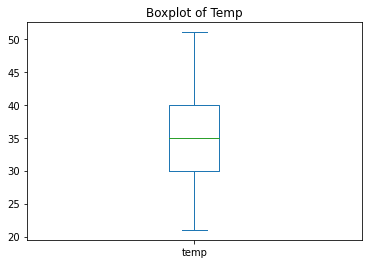

In [39]:
data['temp'].plot.box(title='Boxplot of Temp')

In [ ]:
# Q7 Prepare barplot for in/out vs temprature.

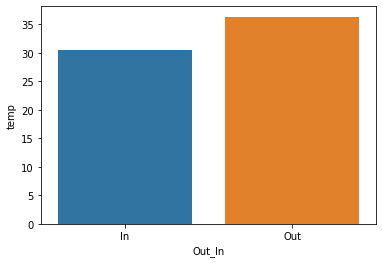

In [42]:
sns.barplot(x="Out_In",y="temp",data=data)
plt.show()